In [1]:
import warnings
warnings.filterwarnings("ignore")

import env
import Liam_wrangle
import pandas as pd

In [2]:
train = pd.read_csv('train_zillow.csv')

In [3]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...  in_los_angeles  \
0       1139.0  6037.0            0.0             2.0  ...               1   
1        882.0  6059.0            0.0             1.0  ...               0   
2        943.0  6037.0            0.0             1.0  ...               1   
3       1449.0  6037.0            0.0             3.0  ...               1   
4       1546.0  6037.0            0.0             2.0  ...               1   

   in_orange_county  in_ventura  house_age   tax_rate     acres  \
0                 0           0       70.0  77.088243  0.115886   
1                 1           0       65.0  99.593289  0.094582   
2                 0           0       81.0  91.300853  0.163522   
3                 0           0       51.0  77.842486  0.141919   
4                 0           0       29.0  51.992135  0.195294   

   level_of_log_error  square_feet_bins  lot_sqft_bins  acre_bins  
0            Accurate           1k-1.5k          0-10k       0-15  
1            Accurate            500-1k          0-10k       0-15  
2            Accurate            500-1k          0-10k       0-15  
3                Over           1k-1.5k          0-10k       0-15  
4            Accurate           1.5l-2k          0-10k       0-15  

[5 rows x 34 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33448 entries, 0 to 33447
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             33448 non-null  int64  
 1   land_type            33448 non-null  float64
 2   has_heating_system   33448 non-null  int64  
 3   bathrooms            33448 non-null  float64
 4   bedrooms             33448 non-null  float64
 5   quality              33448 non-null  float64
 6   square_feet          33448 non-null  float64
 7   fips                 33448 non-null  float64
 8   has_fireplace        33448 non-null  float64
 9   full_bathrooms       33448 non-null  float64
 10  latitude             33448 non-null  float64
 11  longitude            33448 non-null  float64
 12  lot_square_feet      33448 non-null  float64
 13  has_pool             33448 non-null  float64
 14  city                 33448 non-null  float64
 15  county               33448 non-null 

In [5]:
import Liam_explore

In [6]:
binary_vars = ['bedrooms', 'bathrooms', 'land_type', 'has_heating_system',
               'fips', 'has_fireplace', 'full_bathrooms','has_pool', 'city','county',
               'zip_code','unitcnt','in_los_angeles', 'in_orange_county', 'in_ventura']

quant_vars = ['square_feet', 'lot_square_feet', 'quality', 'latitude', 'bathrooms', 'bedrooms',
                'longitude','room_count', 'structure_tax_value','tax_value', 'land_tax_value', 
              'taxamount', 'house_age', 'tax_rate']

categorical_target = 'level_of_log_error'
continuous_target = 'logerror'

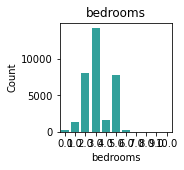

      bedrooms  Count  Percent
3.0        3.0  14239    42.57
2.0        2.0   8018    23.97
4.0        5.0   7798    23.31
5.0        4.0   1651     4.94
1.0        1.0   1295     3.87
6.0        6.0    221     0.66
0.0        0.0    184     0.55
7.0        7.0     35     0.10
8.0        8.0      4     0.01
9.0        9.0      2     0.01
10.0      10.0      1     0.00
_________________________________________________________________


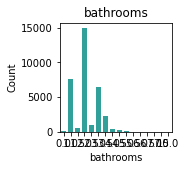

      bathrooms  Count  Percent
2.0         2.0  14917    44.60
3.0         1.0   7547    22.56
1.0         3.0   6427    19.21
2.5         3.5   2296     6.86
4.0         2.5    913     2.73
1.5         1.5    527     1.58
3.5         4.0    356     1.06
5.0         4.5    192     0.57
4.5         5.0    162     0.48
0.0         0.0     56     0.17
6.0         6.0     27     0.08
5.5         6.5     19     0.06
6.5         5.5      4     0.01
7.0         7.5      3     0.01
7.5         7.0      1     0.00
10.0       10.0      1     0.00
_________________________________________________________________


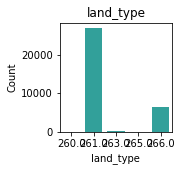

       land_type  Count  Percent
261.0      261.0  26840    80.24
266.0      266.0   6386    19.09
265.0      263.0    171     0.51
263.0      265.0     46     0.14
260.0      260.0      5     0.01
_________________________________________________________________


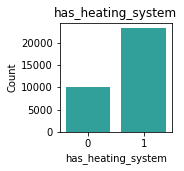

   has_heating_system  Count  Percent
1                   1  23281     69.6
0                   0  10167     30.4
_________________________________________________________________


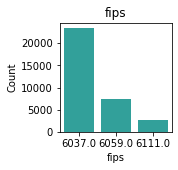

          fips  Count  Percent
6037.0  6037.0  23390    69.93
6059.0  6059.0   7373    22.04
6111.0  6111.0   2685     8.03
_________________________________________________________________


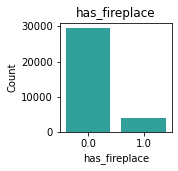

     has_fireplace  Count  Percent
0.0            0.0  29451    88.05
1.0            1.0   3997    11.95
_________________________________________________________________


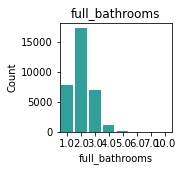

      full_bathrooms  Count  Percent
2.0              2.0  17280    51.66
3.0              1.0   7901    23.62
1.0              3.0   6951    20.78
4.0              4.0   1072     3.20
5.0              5.0    209     0.62
6.0              6.0     30     0.09
7.0              7.0      4     0.01
10.0            10.0      1     0.00
_________________________________________________________________


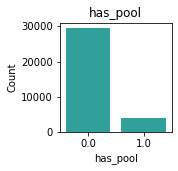

     has_pool  Count  Percent
0.0       0.0  29451    88.05
1.0       1.0   3997    11.95
_________________________________________________________________


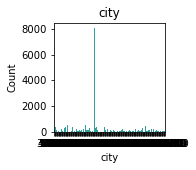

              city  Count  Percent
12447.0    26483.0   8046    24.06
46298.0    13693.0   1254     3.75
25218.0   396054.0   1068     3.19
5534.0     20008.0   1011     3.02
40227.0    40227.0    867     2.59
...            ...    ...      ...
118880.0   14906.0      2     0.01
6822.0     36078.0      2     0.01
10815.0    31134.0      2     0.01
31134.0    13232.0      1     0.00
36078.0     6822.0      1     0.00

[174 rows x 3 columns]
_________________________________________________________________


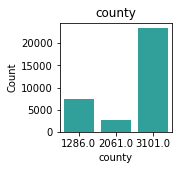

        county  Count  Percent
3101.0  3101.0  23390    69.93
1286.0  1286.0   7373    22.04
2061.0  2061.0   2685     8.03
_________________________________________________________________


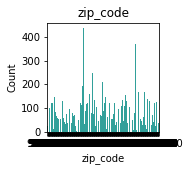

         zip_code  Count  Percent
97319.0   96197.0    436     1.30
97318.0   96982.0    369     1.10
97329.0   96437.0    324     0.97
97328.0   96506.0    306     0.91
97118.0   97329.0    277     0.83
...           ...    ...      ...
96963.0  399675.0      1     0.00
97111.0   96467.0      1     0.00
97088.0   97331.0      1     0.00
96467.0   97111.0      1     0.00
95991.0   96963.0      1     0.00

[385 rows x 3 columns]
_________________________________________________________________


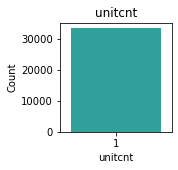

   unitcnt  Count  Percent
1        1  33448    100.0
_________________________________________________________________


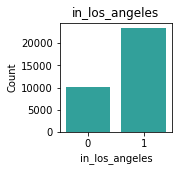

   in_los_angeles  Count  Percent
1               1  23390    69.93
0               0  10058    30.07
_________________________________________________________________


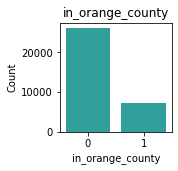

   in_orange_county  Count  Percent
0                 0  26075    77.96
1                 1   7373    22.04
_________________________________________________________________


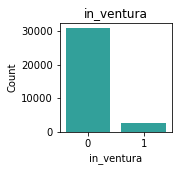

   in_ventura  Count  Percent
0           0  30763    91.97
1           1   2685     8.03
_________________________________________________________________


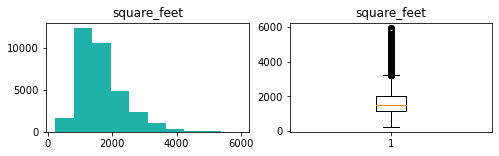

count    33448.000000
mean      1666.251136
std        711.104096
min        240.000000
25%       1168.000000
50%       1498.500000
75%       2006.000000
max       5960.000000
Name: square_feet, dtype: float64


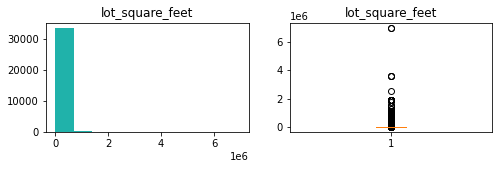

count    3.344800e+04
mean     3.056563e+04
std      1.147073e+05
min      2.360000e+02
25%      5.791000e+03
50%      7.239000e+03
75%      1.173625e+04
max      6.971010e+06
Name: lot_square_feet, dtype: float64


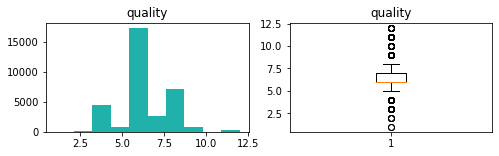

count    33448.000000
mean         6.304383
std          1.348526
min          1.000000
25%          6.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: quality, dtype: float64


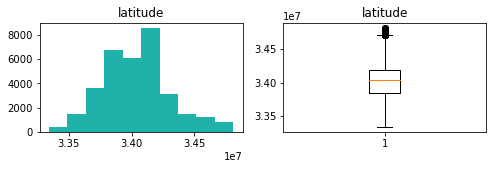

count    3.344800e+04
mean     3.403654e+07
std      2.621481e+05
min      3.334066e+07
25%      3.384308e+07
50%      3.404450e+07
75%      3.419000e+07
max      3.481240e+07
Name: latitude, dtype: float64


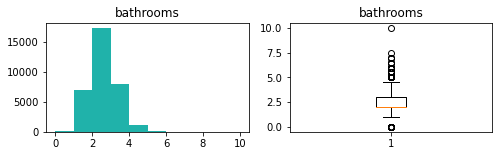

count    33448.000000
mean         2.163074
std          0.813282
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


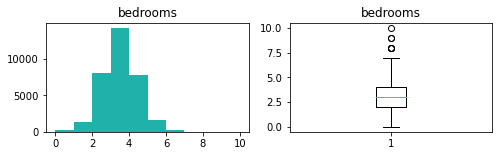

count    33448.000000
mean         3.023380
std          0.978248
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64


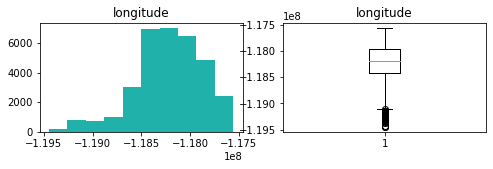

count    3.344800e+04
mean    -1.182201e+08
std      3.479816e+05
min     -1.194484e+08
25%     -1.184243e+08
50%     -1.181893e+08
75%     -1.179659e+08
max     -1.175546e+08
Name: longitude, dtype: float64


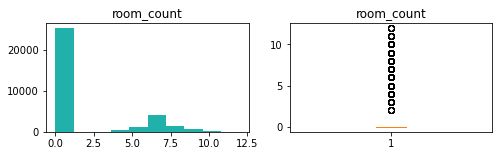

count    33448.000000
mean         1.614805
std          2.939851
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: room_count, dtype: float64


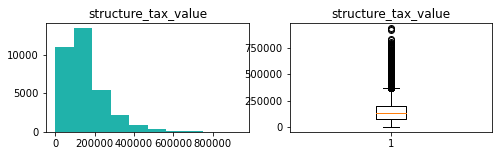

count     33448.000000
mean     152115.875448
std      105860.715954
min         129.000000
25%       78880.750000
50%      126906.000000
75%      194975.500000
max      938000.000000
Name: structure_tax_value, dtype: float64


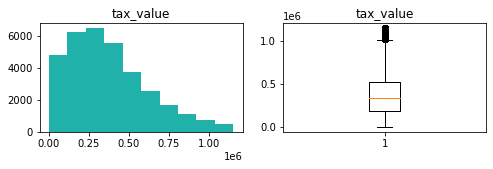

count    3.344800e+04
mean     3.771605e+05
std      2.470988e+05
min      1.000000e+03
25%      1.850925e+05
50%      3.317800e+05
75%      5.190188e+05
max      1.153324e+06
Name: tax_value, dtype: float64


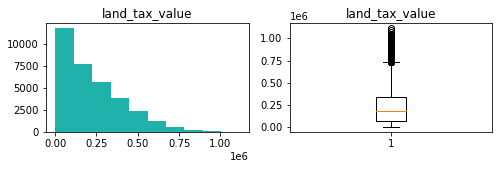

count    3.344800e+04
mean     2.251374e+05
std      1.856513e+05
min      1.000000e+03
25%      6.730500e+04
50%      1.825880e+05
75%      3.339140e+05
max      1.116775e+06
Name: land_tax_value, dtype: float64


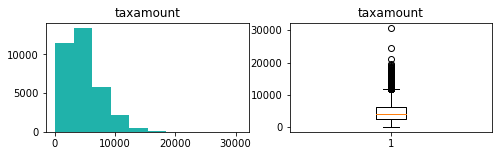

count    33448.000000
mean      4676.613885
std       2891.516595
min         51.260000
25%       2508.280000
50%       4160.315000
75%       6246.762500
max      30690.350000
Name: taxamount, dtype: float64


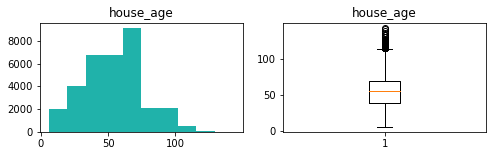

count    33448.000000
mean        54.895270
std         22.056241
min          6.000000
25%         39.000000
50%         56.000000
75%         69.000000
max        143.000000
Name: house_age, dtype: float64


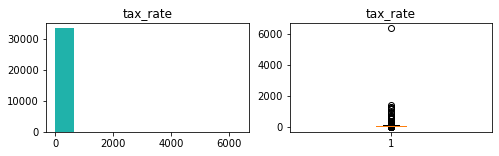

count    33448.000000
mean        79.070384
std         42.444816
min          1.224755
25%         73.523028
50%         80.911769
75%         84.716479
max       6380.493274
Name: tax_rate, dtype: float64


In [7]:
Liam_explore.explore_univariate(train, binary_vars, quant_vars)

## Takeaways

- 6037 = LA
- 6059 = Orange
- 6111 = Ventura

bedrooms 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=120425.5, pvalue=0.8126268345400564)
         chi2       p-value  degrees of freedom
0  213.410887  1.559488e-25                  40

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
bedrooms                                                             
0.0                      151    15     16         2          0    184
1.0                     1154    83     52         4          2   1295
2.0                     7145   489    356        23          5   8018
3.0                    12989   792    410        38         10  14239
4.0                     7220   398    149        26          5   7798
5.0                     1496   111     38         5          1   1651
6.0                      198    17      4         1          1    221
7.0                       31     3      1         0          0     35
8.0                        0     3      1         0     

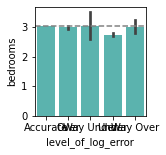


_____________________

bathrooms 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=163310.0, pvalue=0.23262480280272546)
         chi2       p-value  degrees of freedom
0  518.036763  3.991413e-74                  60

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
bathrooms                                                            
0.0                       37     7     10         2          0     56
1.0                     5505   534    357        22          9   6427
1.5                      480    33     11         3          0    527
2.0                    13683   789    395        39         11  14917
2.5                     2192    72     20        10          2   2296
3.0                     6994   357    180        15          1   7547
3.5                      331    12     11         2          0    356
4.0                      801    76     31         5          0    913
4.5                      147  

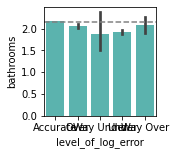


_____________________

land_type 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  137.789606  1.949882e-21                  16

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
land_type                                                            
260.0                      2     1      2         0          0      5
261.0                  24208  1638    882        89         23  26840
263.0                     32     9      4         1          0     46
265.0                    153    11      6         1          0    171
266.0                   5990   254    133         8          1   6386
All                    30385  1913   1027        99         24  33448

expected:
               0            1           2          3          4
0      4.542125     0.285966    0.153522   0.014799   0.003588
1  24382.127481  1535.066970  824.105477  79.441521  

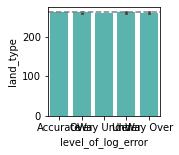


_____________________

has_heating_system 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=123249044.5, pvalue=1.613353398197403e-09)
        chi2       p-value  degrees of freedom
0  65.893365  1.668149e-13                   4

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
has_heating_system                                                   
0                       9355   534    220        50          8  10167
1                      21030  1379    807        49         16  23281
All                    30385  1913   1027        99         24  33448

expected:
               0            1         2          3          4
0   9235.957157   581.483826  312.1714  30.092472   7.295145
1  21149.042843  1331.516174  714.8286  68.907528  16.704855


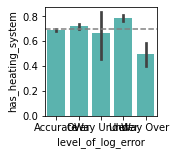


_____________________

fips 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  113.852462  6.139304e-21                   8

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
fips                                                                 
6037.0                 21058  1427    837        52         16  23390
6059.0                  6852   343    138        37          3   7373
6111.0                  2475   143     52        10          5   2685
All                    30385  1913   1027        99         24  33448

expected:
               0            1           2          3          4
0  21248.061170  1337.750239  718.175377  69.230148  16.783066
1   6697.817657   421.685871  226.383371  21.822740   5.290361
2   2439.121173   153.563890   82.441252   7.947112   1.926573


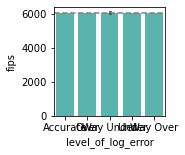


_____________________

has_fireplace 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=57965520.5, pvalue=0.11929566442394926)
        chi2       p-value  degrees of freedom
0  40.478663  3.445966e-08                   4

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
has_fireplace                                                        
0.0                    26657  1735    954        86         19  29451
1.0                     3728   178     73        13          5   3997
All                    30385  1913   1027        99         24  33448

expected:
               0            1           2          3          4
0  26754.025203  1684.398559  904.274605  87.169607  21.132026
1   3630.974797   228.601441  122.725395  11.830393   2.867974


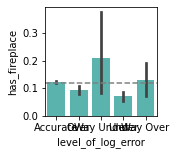


_____________________

full_bathrooms 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  361.915747  9.940325e-60                  28

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
full_bathrooms                                                       
1.0                     5983   567    367        25          9   6951
2.0                    15922   868    426        51         13  17280
3.0                     7323   369    191        17          1   7901
4.0                      945    87     34         6          0   1072
5.0                      184    18      7         0          0    209
6.0                       25     2      2         0          1     30
7.0                        3     1      0         0          0      4
10.0                       0     1      0         0          0      1
All                    30385  1913   1027     

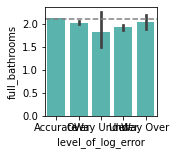


_____________________

has_pool 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=57965520.5, pvalue=0.11929566442394926)
        chi2       p-value  degrees of freedom
0  40.478663  3.445966e-08                   4

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
has_pool                                                             
0.0                    26657  1735    954        86         19  29451
1.0                     3728   178     73        13          5   3997
All                    30385  1913   1027        99         24  33448

expected:
               0            1           2          3          4
0  26754.025203  1684.398559  904.274605  87.169607  21.132026
1   3630.974797   228.601441  122.725395  11.830393   2.867974


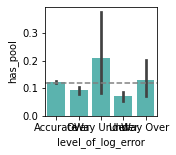


_____________________

city 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
          chi2       p-value  degrees of freedom
0  1407.946433  3.823253e-51                 692

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
city                                                                 
3491.0                     8     1      0         0          0      9
4406.0                   225    13      3         1          0    242
5465.0                   136     7      5         0          0    148
5534.0                   903    60     45         3          0   1011
6021.0                   125     6      4         0          0    135
...                      ...   ...    ...       ...        ...    ...
396054.0                 280     9     12         1          1    303
396550.0                  31     6      1         0          0     38
396551.0                  67     1      0         0   

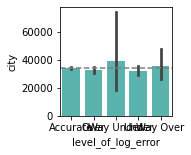


_____________________

county 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
         chi2       p-value  degrees of freedom
0  113.852462  6.139304e-21                   8

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
county                                                               
1286.0                  6852   343    138        37          3   7373
2061.0                  2475   143     52        10          5   2685
3101.0                 21058  1427    837        52         16  23390
All                    30385  1913   1027        99         24  33448

expected:
               0            1           2          3          4
0   6697.817657   421.685871  226.383371  21.822740   5.290361
1   2439.121173   153.563890   82.441252   7.947112   1.926573
2  21248.061170  1337.750239  718.175377  69.230148  16.783066


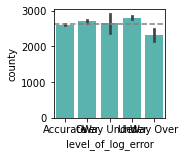


_____________________

zip_code 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
          chi2        p-value  degrees of freedom
0  3402.273762  1.166513e-142                1536

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
zip_code                                                             
95982.0                   25     6      6         1          0     38
95983.0                   62    14      8         0          1     85
95984.0                   43     7     14         0          1     65
95985.0                   48     3      3         0          0     54
95986.0                   29     5      0         0          0     34
...                      ...   ...    ...       ...        ...    ...
97330.0                  194     9      2         1          0    206
97331.0                    5     1      0         0          0      6
97344.0                   24     4      2       

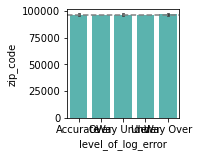


_____________________

unitcnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)
   chi2  p-value  degrees of freedom
0   0.0      1.0                   0

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
unitcnt                                                              
1                      30385  1913   1027        99         24  33448
All                    30385  1913   1027        99         24  33448

expected:
          0       1       2     3     4
0  30385.0  1913.0  1027.0  99.0  24.0


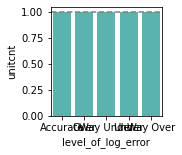


_____________________

in_los_angeles 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=122038612.0, pvalue=5.144704637883828e-08)
         chi2       p-value  degrees of freedom
0  105.216703  7.615802e-22                   4

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
in_los_angeles                                                       
0                       9327   486    190        47          8  10058
1                      21058  1427    837        52         16  23390
All                    30385  1913   1027        99         24  33448

expected:
              0            1           2          3          4
0   9136.93883   575.249761  308.824623  29.769852   7.216934
1  21248.06117  1337.750239  718.175377  69.230148  16.783066


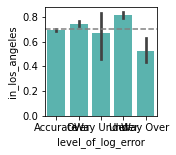


_____________________

in_orange_county 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=92122302.0, pvalue=4.5378842501982795e-08)
        chi2       p-value  degrees of freedom
0  82.462422  5.237766e-17                   4

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
in_orange_county                                                     
0                      23533  1570    889        62         21  26075
1                       6852   343    138        37          3   7373
All                    30385  1913   1027        99         24  33448

expected:
               0            1           2         3          4
0  23687.182343  1491.314129  800.616629  77.17726  18.709639
1   6697.817657   421.685871  226.383371  21.82274   5.290361


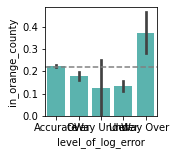


_____________________

in_ventura 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=40892211.0, pvalue=0.3961825314586387)
        chi2   p-value  degrees of freedom
0  19.492894  0.000629                   4

observed:
 level_of_log_error  Accurate  Over  Under  Way Over  Way Under    All
in_ventura                                                           
0                      27910  1770    975        89         19  30763
1                       2475   143     52        10          5   2685
All                    30385  1913   1027        99         24  33448

expected:
               0           1           2          3          4
0  27945.878827  1759.43611  944.558748  91.052888  22.073427
1   2439.121173   153.56389   82.441252   7.947112   1.926573


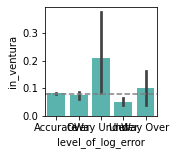


_____________________

square_feet 
____________________



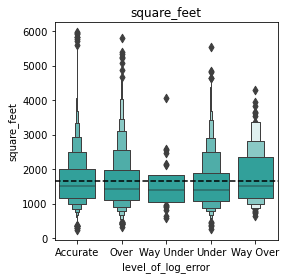

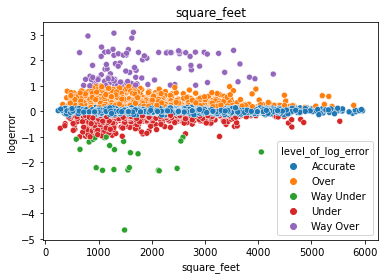

level_of_log_error      Accurate         Over        Under     Way Over  \
count               30385.000000  1913.000000  1027.000000    99.000000   
mean                 1670.237782  1640.650810  1587.629017  1780.080808   
std                   703.932784   787.518786   751.391971   834.470952   
min                   240.000000   326.000000   280.000000   642.000000   
25%                  1176.000000  1094.000000  1079.000000  1170.000000   
50%                  1506.000000  1431.000000  1403.000000  1519.000000   
75%                  2010.000000  1980.000000  1902.500000  2352.000000   
max                  5960.000000  5794.000000  5533.000000  4282.000000   

level_of_log_error    Way Under  
count                 24.000000  
mean                1554.375000  
std                  786.210051  
min                  580.000000  
25%                 1044.250000  
50%                 1384.000000  
75%                 1836.250000  
max                 4058.000000   


Spearman's Corr

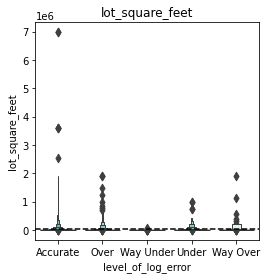

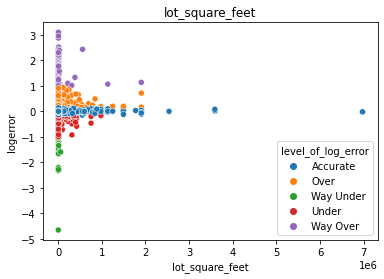

level_of_log_error      Accurate          Over          Under      Way Over  \
count               3.038500e+04  1.913000e+03    1027.000000  9.900000e+01   
mean                3.089491e+04  2.656959e+04   26313.796495  5.605799e+04   
std                 1.160910e+05  1.006165e+05   75433.943600  2.319726e+05   
min                 2.360000e+02  7.700000e+02     435.000000  6.520000e+02   
25%                 5.794000e+03  5.828000e+03    5650.500000  5.788500e+03   
50%                 7.248000e+03  7.200000e+03    7190.000000  6.900000e+03   
75%                 1.177100e+04  1.139100e+04   12012.500000  1.025550e+04   
max                 6.971010e+06  1.904165e+06  978900.000000  1.904165e+06   

level_of_log_error     Way Under  
count                  24.000000  
mean                 8998.125000  
std                 10417.447548  
min                  1306.000000  
25%                  5294.000000  
50%                  6624.500000  
75%                  7754.000000  
max     

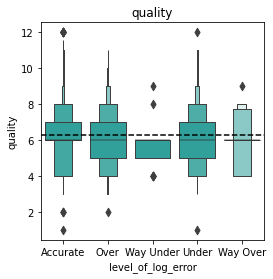

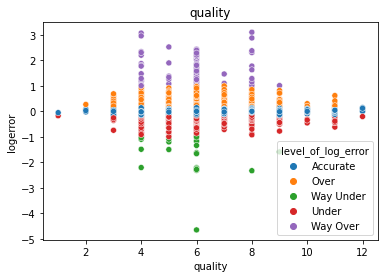

level_of_log_error      Accurate         Over        Under   Way Over  \
count               30385.000000  1913.000000  1027.000000  99.000000   
mean                    6.329801     6.045478     6.091529   5.868687   
std                     1.335578     1.432776     1.500291   1.174964   
min                     1.000000     2.000000     1.000000   4.000000   
25%                     6.000000     5.000000     5.000000   6.000000   
50%                     6.000000     6.000000     6.000000   6.000000   
75%                     7.000000     7.000000     7.000000   6.000000   
max                    12.000000    11.000000    12.000000   9.000000   

level_of_log_error  Way Under  
count               24.000000  
mean                 5.666667  
std                  1.203859  
min                  4.000000  
25%                  5.000000  
50%                  6.000000  
75%                  6.000000  
max                  9.000000   


Spearman's Correlation Test:
 SpearmanrResult(corre

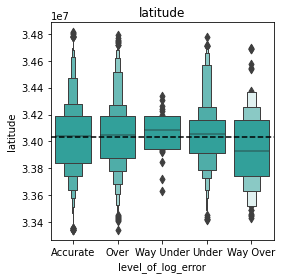

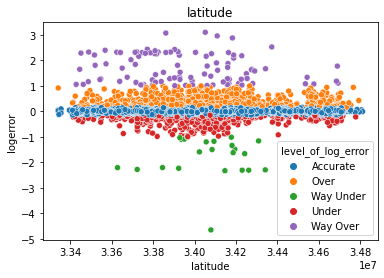

level_of_log_error      Accurate          Over         Under      Way Over  \
count               3.038500e+04  1.913000e+03  1.027000e+03  9.900000e+01   
mean                3.403535e+07  3.404775e+07  3.405813e+07  3.395556e+07   
std                 2.635435e+05  2.492697e+05  2.392361e+05  2.945853e+05   
min                 3.334066e+07  3.334085e+07  3.341392e+07  3.342762e+07   
25%                 3.384037e+07  3.387574e+07  3.391742e+07  3.374615e+07   
50%                 3.404315e+07  3.404777e+07  3.405441e+07  3.392647e+07   
75%                 3.419168e+07  3.418738e+07  3.415752e+07  3.416295e+07   
max                 3.481240e+07  3.479433e+07  3.477938e+07  3.469392e+07   

level_of_log_error     Way Under  
count               2.400000e+01  
mean                3.406095e+07  
std                 1.805973e+05  
min                 3.362772e+07  
25%                 3.394614e+07  
50%                 3.408195e+07  
75%                 3.418871e+07  
max              

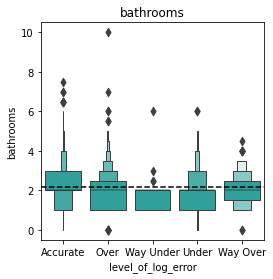

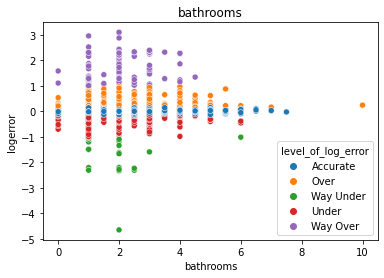

level_of_log_error      Accurate         Over        Under   Way Over  \
count               30385.000000  1913.000000  1027.000000  99.000000   
mean                    2.178542     2.053319     1.924537   2.080808   
std                     0.800219     0.923049     0.905582   0.894162   
min                     0.000000     0.000000     0.000000   0.000000   
25%                     2.000000     1.000000     1.000000   1.500000   
50%                     2.000000     2.000000     2.000000   2.000000   
75%                     3.000000     2.500000     2.000000   2.500000   
max                     7.500000    10.000000     6.000000   4.500000   

level_of_log_error  Way Under  
count               24.000000  
mean                 1.875000  
std                  1.065772  
min                  1.000000  
25%                  1.000000  
50%                  2.000000  
75%                  2.000000  
max                  6.000000   


Spearman's Correlation Test:
 SpearmanrResult(corre

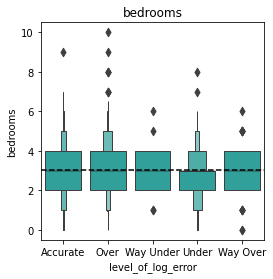

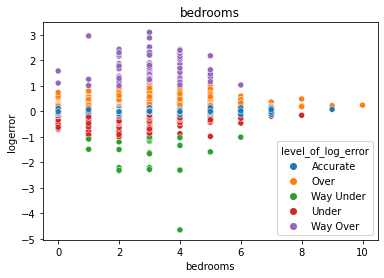

level_of_log_error      Accurate         Over        Under   Way Over  \
count               30385.000000  1913.000000  1027.000000  99.000000   
mean                    3.033898     3.005750     2.744888   3.020202   
std                     0.970251     1.062615     0.996661   1.068852   
min                     0.000000     0.000000     0.000000   0.000000   
25%                     2.000000     2.000000     2.000000   2.000000   
50%                     3.000000     3.000000     3.000000   3.000000   
75%                     4.000000     4.000000     3.000000   4.000000   
max                     9.000000    10.000000     8.000000   6.000000   

level_of_log_error  Way Under  
count               24.000000  
mean                 3.041667  
std                  1.160179  
min                  1.000000  
25%                  2.000000  
50%                  3.000000  
75%                  4.000000  
max                  6.000000   


Spearman's Correlation Test:
 SpearmanrResult(corre

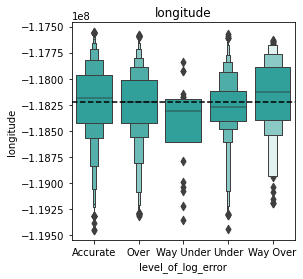

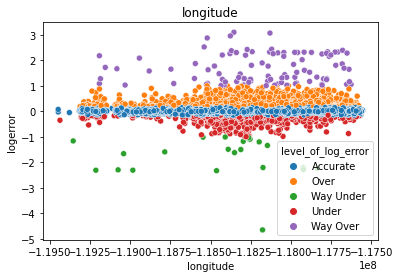

level_of_log_error      Accurate          Over         Under      Way Over  \
count               3.038500e+04  1.913000e+03  1.027000e+03  9.900000e+01   
mean               -1.182169e+08 -1.182456e+08 -1.182665e+08 -1.181803e+08   
std                 3.505861e+05  3.283639e+05  2.889650e+05  3.871167e+05   
min                -1.194484e+08 -1.193122e+08 -1.194374e+08 -1.191920e+08   
25%                -1.184263e+08 -1.184185e+08 -1.184040e+08 -1.183938e+08   
50%                -1.181845e+08 -1.182227e+08 -1.182684e+08 -1.181306e+08   
75%                -1.179604e+08 -1.180134e+08 -1.181194e+08 -1.178841e+08   
max                -1.175546e+08 -1.175793e+08 -1.175743e+08 -1.176258e+08   

level_of_log_error     Way Under  
count               2.400000e+01  
mean               -1.184439e+08  
std                 4.162511e+05  
min                -1.193551e+08  
25%                -1.186066e+08  
50%                -1.183043e+08  
75%                -1.181925e+08  
max              

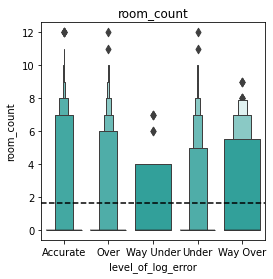

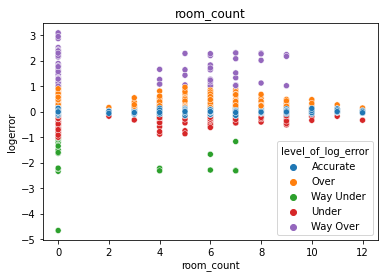

level_of_log_error      Accurate         Over        Under   Way Over  \
count               30385.000000  1913.000000  1027.000000  99.000000   
mean                    1.646437     1.387872     1.049659   2.131313   
std                     2.965844     2.707324     2.451174   3.138459   
min                     0.000000     0.000000     0.000000   0.000000   
25%                     0.000000     0.000000     0.000000   0.000000   
50%                     0.000000     0.000000     0.000000   0.000000   
75%                     0.000000     0.000000     0.000000   5.500000   
max                    12.000000    12.000000    12.000000   9.000000   

level_of_log_error  Way Under  
count               24.000000  
mean                 1.708333  
std                  2.804952  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  4.000000  
max                  7.000000   


Spearman's Correlation Test:
 SpearmanrResult(corre

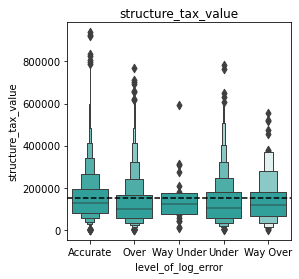

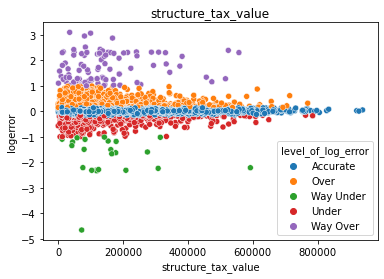

level_of_log_error       Accurate           Over          Under  \
count                30385.000000    1913.000000    1027.000000   
mean                154100.395820  129744.989545  135873.028238   
std                 105239.910891  108090.628142  111834.316920   
min                    470.000000     132.000000     129.000000   
25%                  81535.000000   56775.000000   57291.500000   
50%                 128900.000000  101070.000000  105812.000000   
75%                 197068.000000  166882.000000  181724.000000   
max                 938000.000000  768998.000000  784173.000000   

level_of_log_error       Way Over      Way Under  
count                   99.000000      24.000000  
mean                144059.060606  151069.291667  
std                 120280.382416  125805.658427  
min                   1050.000000   11366.000000  
25%                  66594.500000   75306.000000  
50%                 120986.000000  121673.000000  
75%                 179797.500000  1777

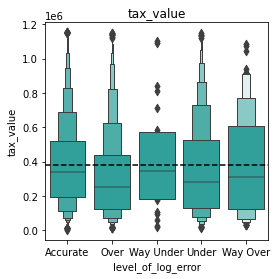

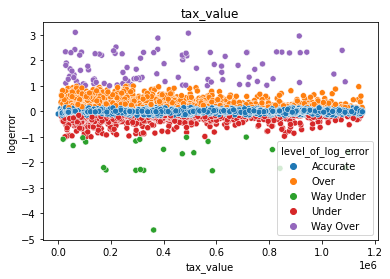

level_of_log_error      Accurate          Over         Under      Way Over  \
count               3.038500e+04  1.913000e+03  1.027000e+03  9.900000e+01   
mean                3.814377e+05  3.196659e+05  3.557244e+05  3.867592e+05   
std                 2.451947e+05  2.514319e+05  2.732060e+05  2.928759e+05   
min                 1.000000e+03  1.168300e+04  1.319800e+04  2.873800e+04   
25%                 1.920000e+05  1.258740e+05  1.291955e+05  1.249420e+05   
50%                 3.380210e+05  2.543310e+05  2.818950e+05  3.096500e+05   
75%                 5.220000e+05  4.394000e+05  5.264765e+05  6.056555e+05   
max                 1.153324e+06  1.151798e+06  1.147000e+06  1.087664e+06   

level_of_log_error     Way Under  
count               2.400000e+01  
mean                4.225109e+05  
std                 3.113770e+05  
min                 1.983300e+04  
25%                 1.798338e+05  
50%                 3.437760e+05  
75%                 5.726260e+05  
max              

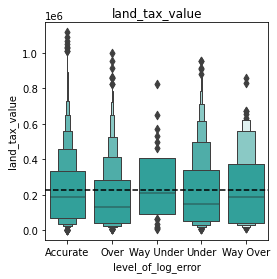

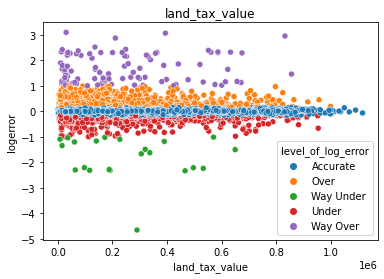

level_of_log_error      Accurate           Over          Under       Way Over  \
count               3.038500e+04    1913.000000    1027.000000      99.000000   
mean                2.274172e+05  190061.963931  220245.377799  242700.101010   
std                 1.847205e+05  181882.101393  208015.555593  217129.337866   
min                 1.000000e+03    4420.000000    5361.000000    9911.000000   
25%                 7.059900e+04   42134.000000   50116.500000   42314.500000   
50%                 1.867760e+05  131360.000000  149312.000000  185889.000000   
75%                 3.362880e+05  281831.000000  339757.000000  371907.000000   
max                 1.116775e+06  999664.000000  954335.000000  856425.000000   

level_of_log_error      Way Under  
count                   24.000000  
mean                271441.583333  
std                 224544.862675  
min                   7636.000000  
25%                  88636.000000  
50%                 209336.000000  
75%               

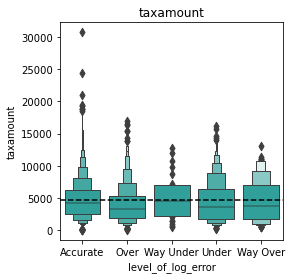

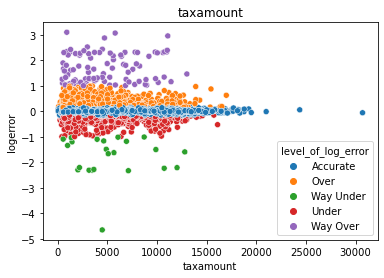

level_of_log_error      Accurate          Over         Under      Way Over  \
count               30385.000000   1913.000000   1027.000000     99.000000   
mean                 4726.641429   4012.750005   4423.366602   4673.548283   
std                  2872.196515   2915.204214   3180.550781   3318.688700   
min                    51.260000    107.900000    236.460000    451.370000   
25%                  2585.840000   1843.610000   1830.090000   1778.050000   
50%                  4229.960000   3312.520000   3543.250000   3712.960000   
75%                  6285.040000   5399.970000   6370.330000   6990.795000   
max                 30690.350000  16976.430000  16098.140000  13005.490000   

level_of_log_error     Way Under  
count                  24.000000  
mean                 5104.660833  
std                  3588.227939  
min                   555.470000  
25%                  2153.990000  
50%                  4560.920000  
75%                  6971.732500  
max              

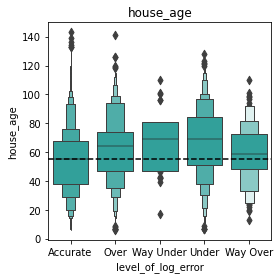

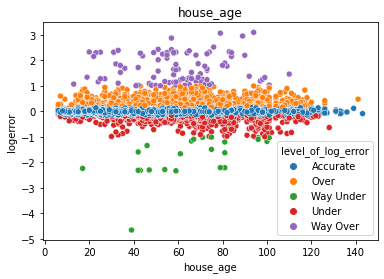

level_of_log_error      Accurate         Over        Under    Way Over  \
count               30385.000000  1913.000000  1027.000000   99.000000   
mean                   53.950206    62.468897    68.022395   59.282828   
std                    21.721647    22.744653    23.625953   20.374574   
min                     6.000000     6.000000     7.000000   13.000000   
25%                    38.000000    47.000000    51.000000   48.000000   
50%                    55.000000    64.000000    69.000000   59.000000   
75%                    68.000000    74.000000    84.000000   72.500000   
max                   143.000000   141.000000   128.000000  110.000000   

level_of_log_error   Way Under  
count                24.000000  
mean                 67.875000  
std                  23.640997  
min                  17.000000  
25%                  46.750000  
50%                  69.000000  
75%                  81.000000  
max                 110.000000   


Spearman's Correlation Test:
 Spe

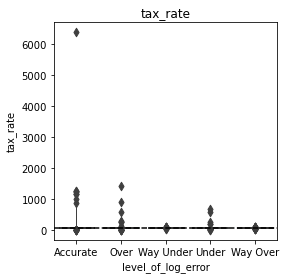

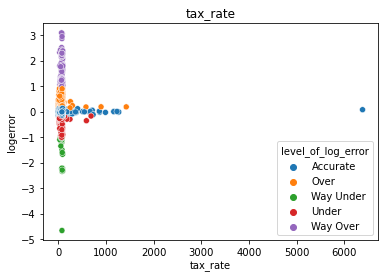

level_of_log_error      Accurate         Over        Under    Way Over  \
count               30385.000000  1913.000000  1027.000000   99.000000   
mean                   79.229440    77.265274    77.787564   78.748543   
std                    42.982281    41.110474    28.923293   14.041800   
min                     1.224755     5.589156     9.505812   32.407501   
25%                    73.764440    70.804228    72.152392   74.603240   
50%                    81.051675    79.257183    80.286195   81.272237   
75%                    84.917698    82.973691    82.987388   87.093405   
max                  6380.493274  1427.849861   689.951673  100.056467   

level_of_log_error  Way Under  
count               24.000000  
mean                77.802619  
std                 15.245441  
min                 35.704899  
25%                 76.758268  
50%                 81.819811  
75%                 86.870090  
max                 93.665048   


Spearman's Correlation Test:
 SpearmanrRes

In [8]:
Liam_explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

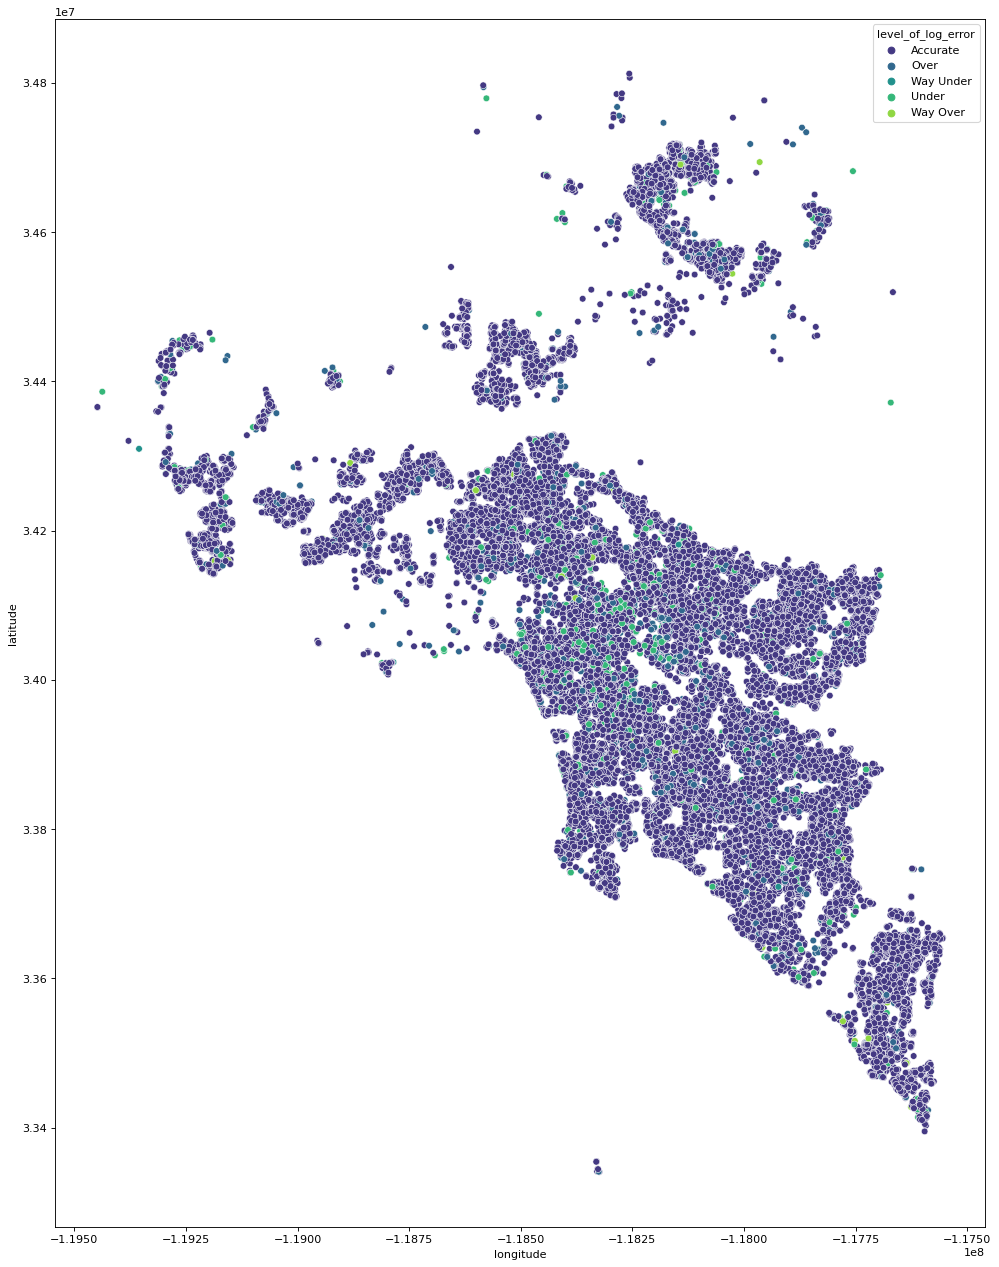

In [9]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(15, 20), dpi=80)
sns.scatterplot(x = train.longitude, y = train.latitude, hue = train.level_of_log_error,palette='viridis')

- I want to cluster on county so that I can see the level of log error for each. I wonder if one county is undervalueing their homes more than others. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

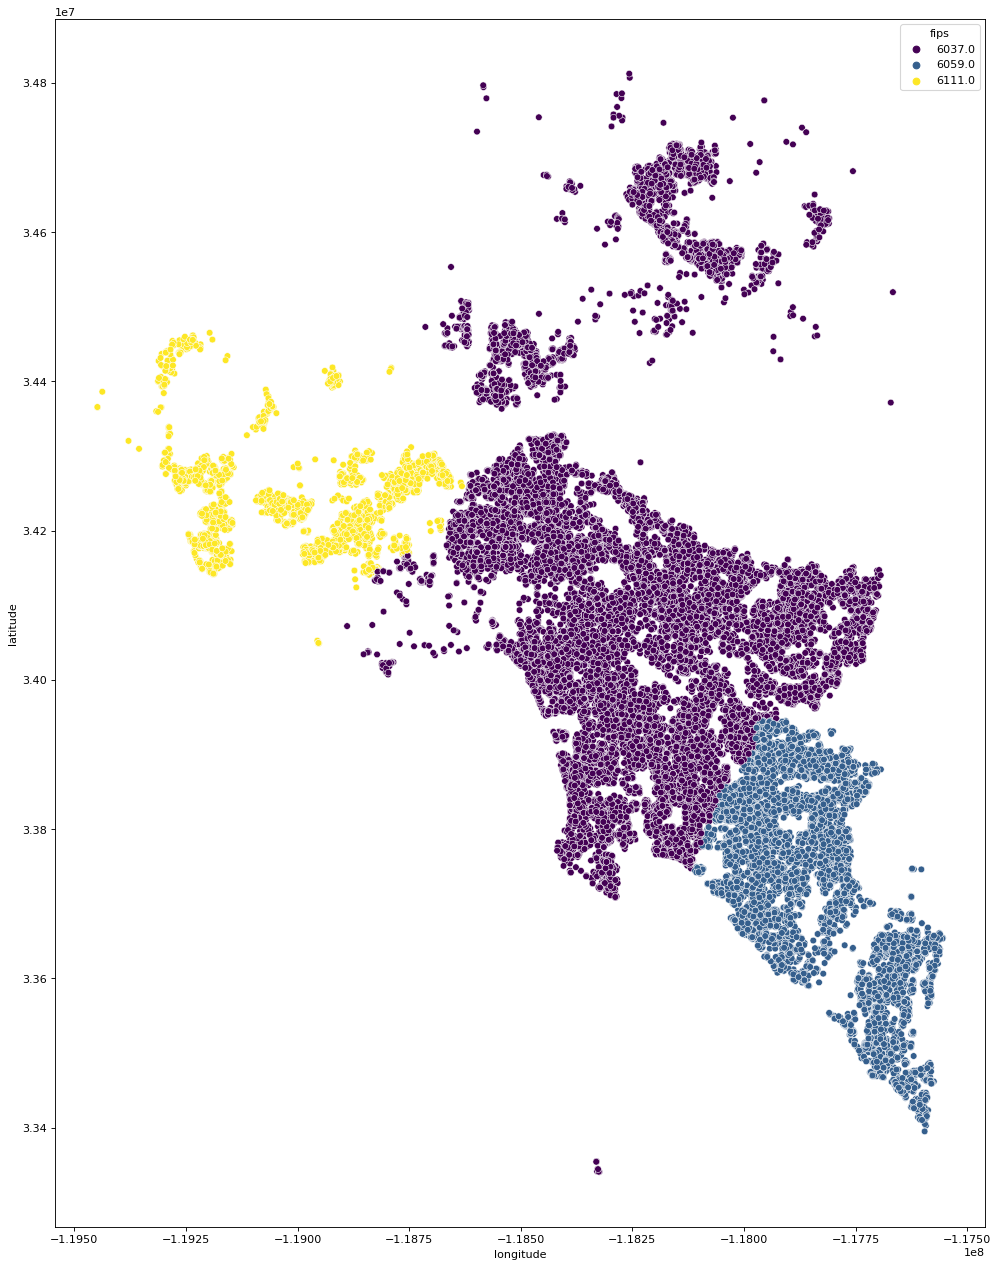

In [10]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(15, 20), dpi=80)
sns.scatterplot(x = train.longitude, y = train.latitude, hue = train.fips, palette='viridis')

In [11]:
import matplotlib.pyplot as plt

<Figure size 1008x648 with 0 Axes>

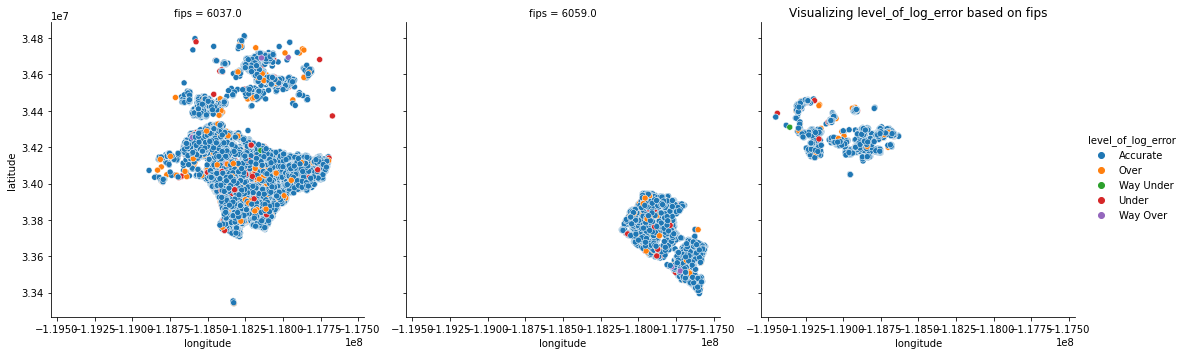

In [12]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.relplot(x = 'longitude', y= 'latitude', data = train, hue = 'level_of_log_error', col = 'fips')

# plot cluster centers (centroids)

# centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing level_of_log_error based on fips')
plt.show();

<AxesSubplot:title={'center':'Log Error Frequencies in Ventura'}, xlabel='level_of_log_error', ylabel='in_ventura'>

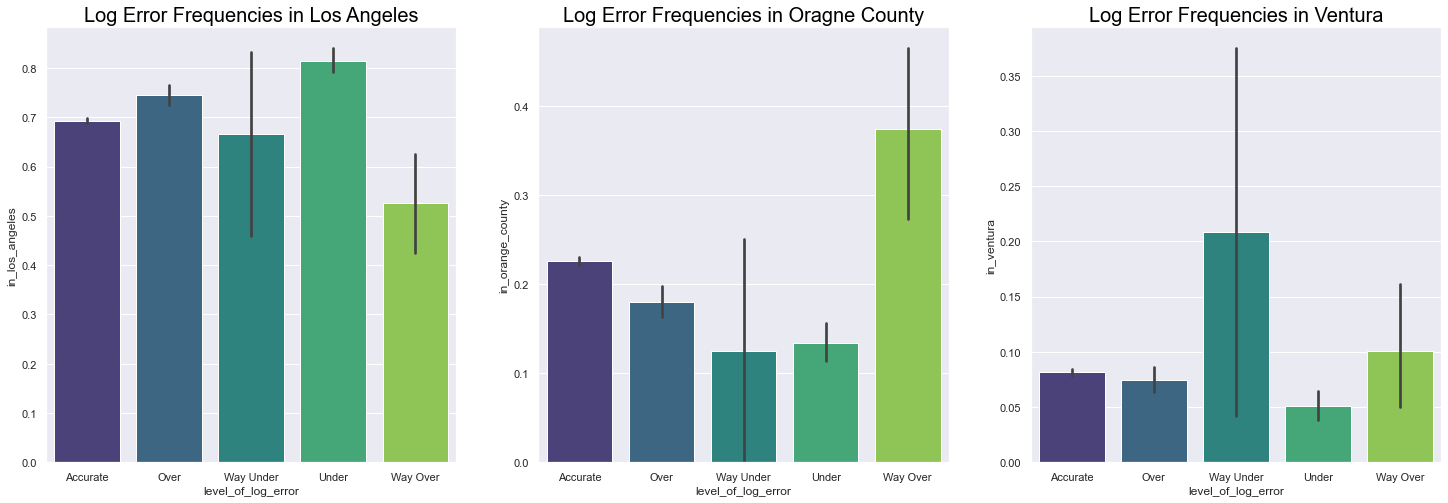

In [13]:
plt.subplots(1, 3, figsize=(25,8), sharey=True)
sns.set(style="darkgrid")
plt.subplot(1,3,1)
plt.title("Log Error Frequencies in Los Angeles", size=20, color='black')
sns.barplot(y='in_los_angeles', x='level_of_log_error', data=train,
               palette='viridis')
plt.subplot(1,3,2)
plt.title("Log Error Frequencies in Oragne County", size=20, color='black')
sns.barplot(y='in_orange_county', x='level_of_log_error', data=train,
               palette='viridis')
plt.subplot(1,3,3)
plt.title("Log Error Frequencies in Ventura", size=20, color='black')
sns.barplot(y='in_ventura', x='level_of_log_error', data=train,
               palette='viridis')


### Takeaways:
- Percentage of log errors:
    - Accurate Percentages
        - ~69% of accurate log error is in Los Angeles
        - ~23% in Oragne County
        - ~8% in Ventura
    - Over Percentages
        - ~75% of Over log errors is in Los Angeles
        - ~18% in Oragne County
        - ~7% in Ventura
    - Wy Under Percentages
        - ~67% of way under log errors in Los Angeles
        - ~12% in Oragne County
        - ~21% in Ventura
    - Under Percentages
        - ~81% of under log errors in Los Angeles
        - ~14% in Oragne County
        - ~5% in Ventura
    - Way Over Percentages
        - ~52% of over log errors is in Los Angeles
        - ~38% in Oragne County
        - ~10% in Ventura

- LA = 80% has the most over value homes(also the most homes overall) 
- OC = as a whole has the highest percent of overvalued homes. 
- VT = has the second highest percentage of under valued homes. 

In [14]:
train.level_of_log_error.value_counts()

Accurate     30385
Over          1913
Under         1027
Way Over        99
Way Under       24
Name: level_of_log_error, dtype: int64

In [15]:
train.fips.value_counts()

6037.0    23390
6059.0     7373
6111.0     2685
Name: fips, dtype: int64

In [16]:
train1 = train.groupby(train.fips == '6037')

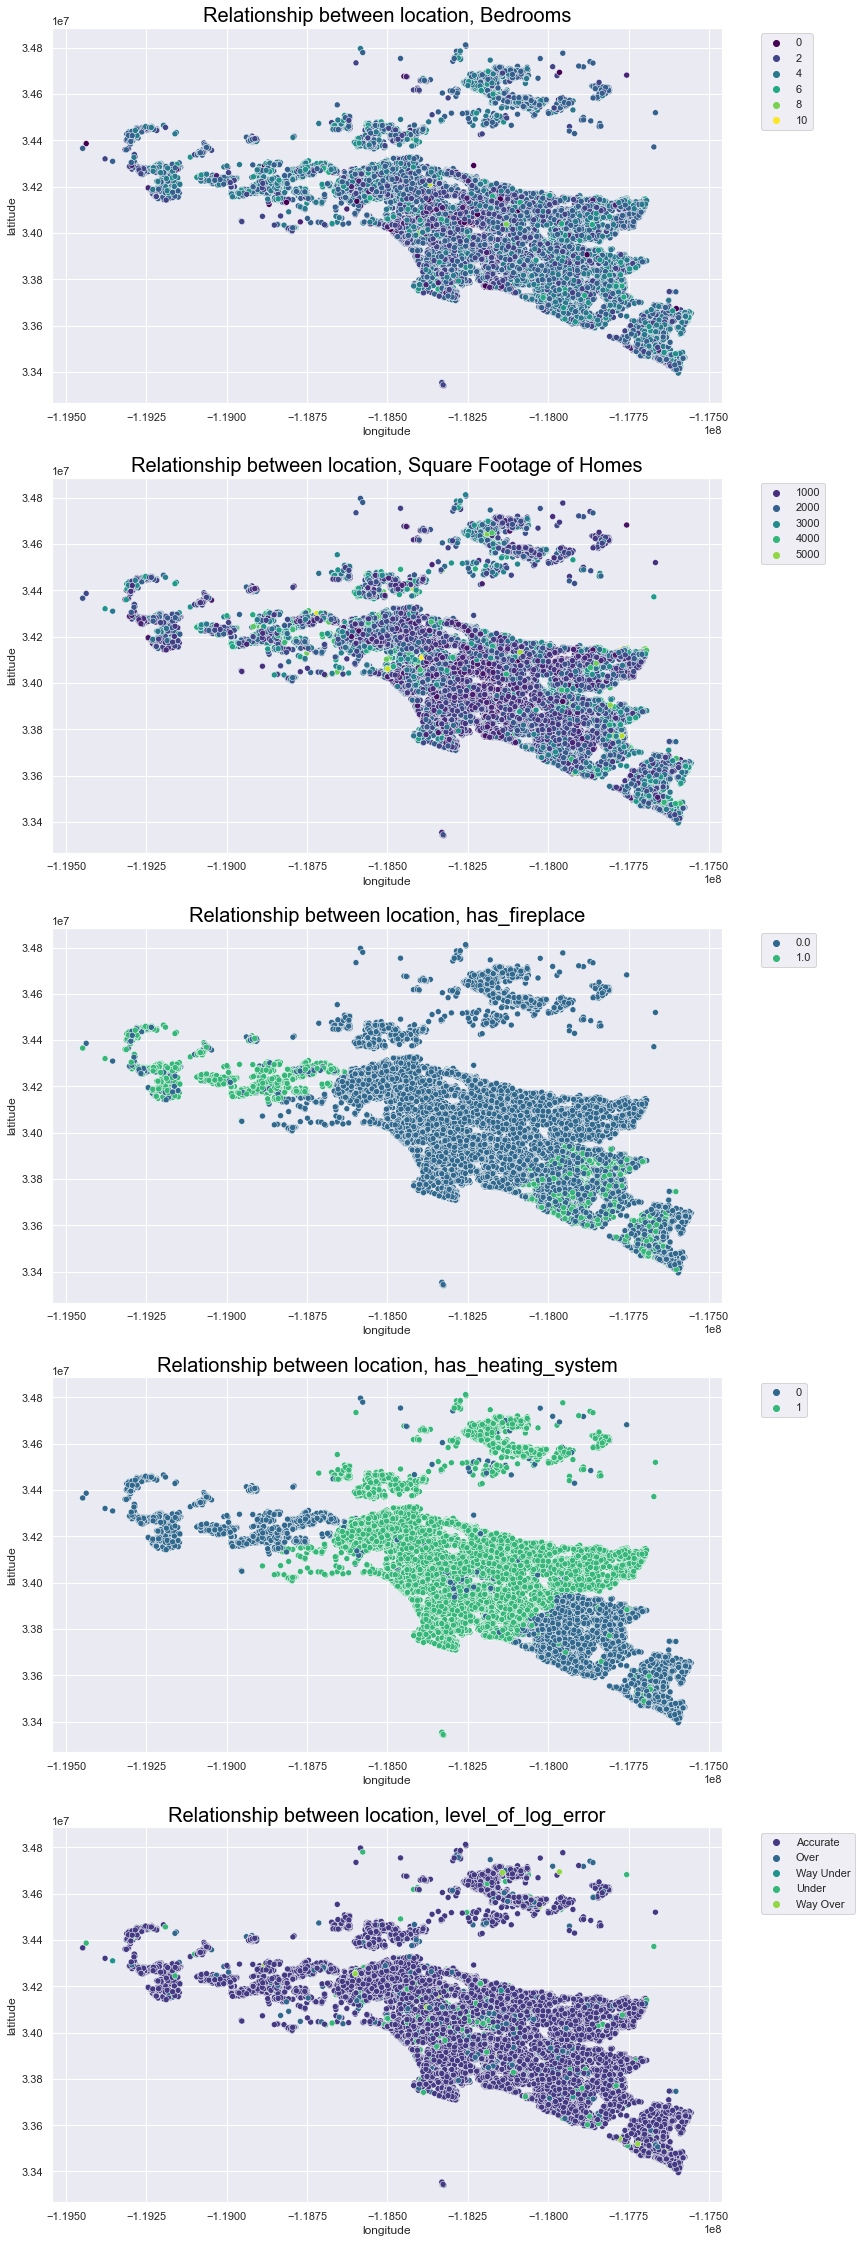

In [17]:
plt.subplots(5, 1, figsize=(12,40), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,1,1)
plt.title("Relationship between location, Bedrooms", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.bedrooms, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,2)
plt.title("Relationship between location, Square Footage of Homes", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='square_feet', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(5,1,3)
plt.title("Relationship between location, has_fireplace", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_fireplace, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,4)
plt.title("Relationship between location, has_heating_system", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue=train.has_heating_system, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(5,1,5)
plt.title("Relationship between location, level_of_log_error", size=20, color='black')
sns.scatterplot(data=train, x='longitude', y='latitude', hue='level_of_log_error', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [18]:
train.bathrooms.value_counts()

2.0     14917
3.0      7547
1.0      6427
2.5      2296
4.0       913
1.5       527
3.5       356
5.0       192
4.5       162
0.0        56
6.0        27
5.5        19
6.5         4
7.0         3
7.5         1
10.0        1
Name: bathrooms, dtype: int64

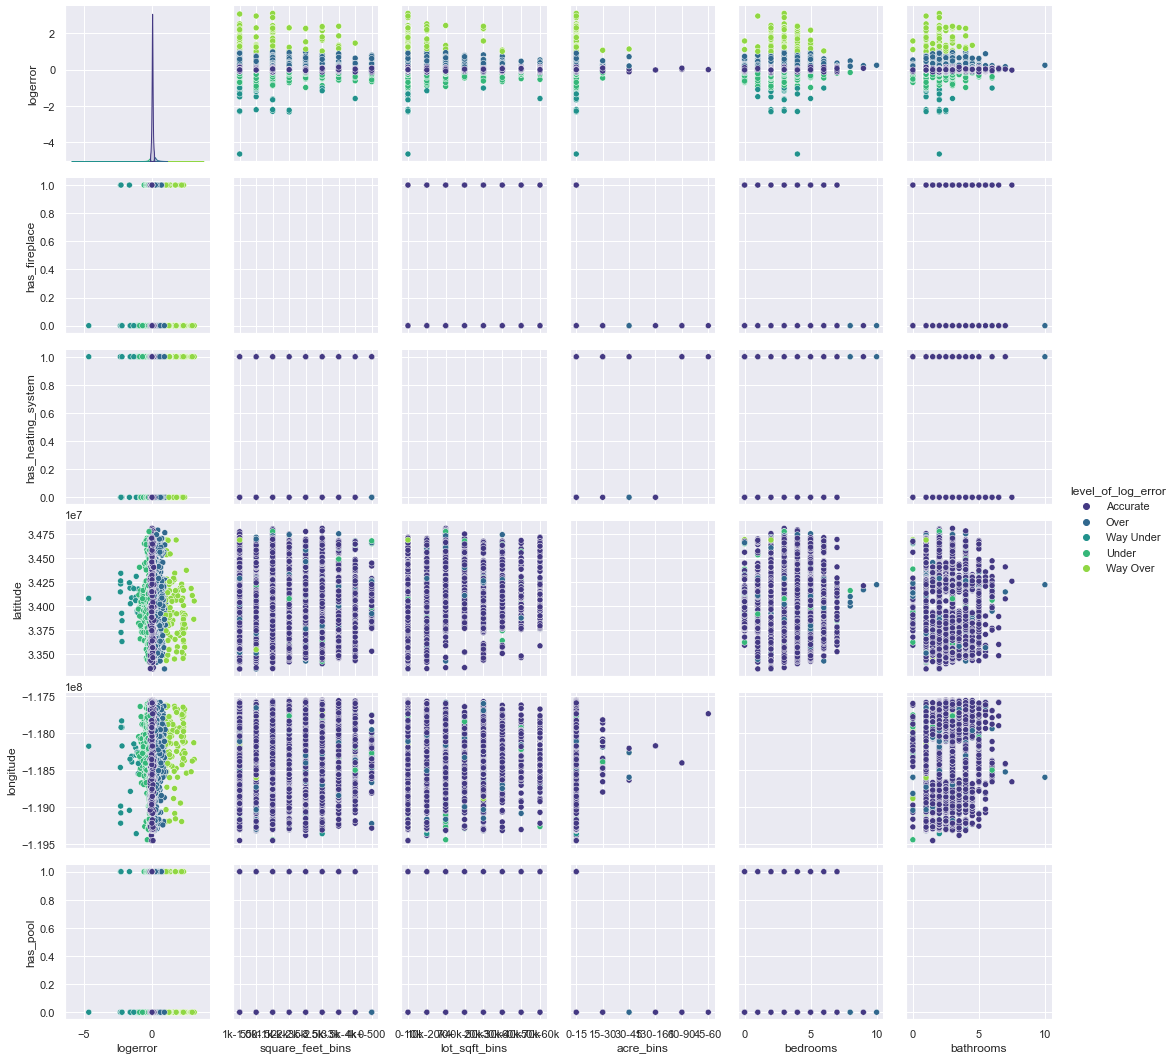

In [19]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'square_feet_bins', 'lot_sqft_bins', 'acre_bins', 
                       'bedrooms', 'bathrooms'],
             y_vars = ['logerror', 'has_fireplace', 'has_heating_system', 'latitude', 
                       'longitude', 'has_pool'], palette='viridis')

## Takeaways

- The higher the log error the more the home is overvalued compared to the zestimate
- The lower the log error the more the home is undervalued compared to the zestimate

# Clustering

In [120]:
X = train[['acres', 'square_feet']]
X.head(3)

acres  square_feet
0  0.115886       1139.0
1  0.094582        882.0
2  0.163522        943.0

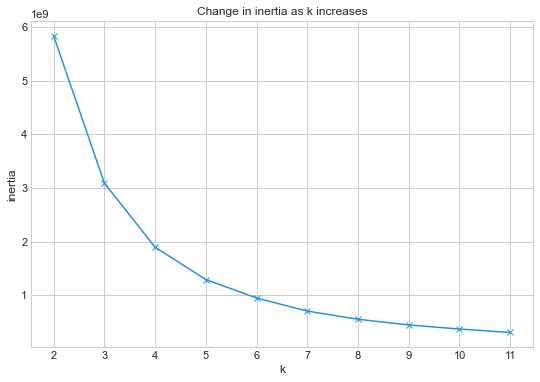

In [121]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [122]:
import viz_kmeans

#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([3, 3, 3, ..., 4, 0, 4], dtype=int32)

In [123]:
train['cluster'] = kmeans.predict(X)

train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...   tax_rate  \
0       1139.0  6037.0            0.0             2.0  ...  77.088243   
1        882.0  6059.0            0.0             1.0  ...  99.593289   
2        943.0  6037.0            0.0             1.0  ...  91.300853   
3       1449.0  6037.0            0.0             3.0  ...  77.842486   
4       1546.0  6037.0            0.0             2.0  ...  51.992135   

      acres  level_of_log_error  square_feet_bins  lot_sqft_bins  acre_bins  \
0  0.115886            Accurate           1k-1.5k          0-10k       0-15   
1  0.094582            Accurate            500-1k          0-10k       0-15   
2  0.163522            Accurate            500-1k          0-10k       0-15   
3  0.141919                Over           1k-1.5k          0-10k       0-15   
4  0.195294            Accurate           1.5l-2k          0-10k       0-15   

   cluster        cen_x     cen_y        c  
0        3   980.973391  0.013482  #DF2020  
1        3   980.973391  0.013482  #DF2020  
2        3   980.973391  0.013482  #DF2020  
3        1  1441.981177  0.014553  #81DF20  
4        1  1441.981177  0.014553  #81DF20  

[5 rows x 38 columns]

In [124]:
import viz_kmeans

In [125]:
# Cluster Centers aka (centroids)

kmeans.cluster_centers_

array([[3.58255117e-01, 2.67362910e+03],
       [6.28136373e-01, 1.42786516e+03],
       [4.27005919e-01, 3.72002918e+03],
       [1.13814253e+00, 9.70033205e+02],
       [5.20614175e-01, 1.96122358e+03]])

In [126]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

acres  square_feet
0  0.358255  2673.629095
1  0.628136  1427.865160
2  0.427006  3720.029176
3  1.138143   970.033205
4  0.520614  1961.223579

In [127]:
# Centriods for unscaled data?

centroids = train.groupby('cluster')['square_feet', 'acres'].mean()
centroids

square_feet     acres
cluster                       
0        2672.601176  0.358383
1        1428.714715  0.625398
2        3717.001450  0.426227
3         970.560092  1.140341
4        1961.922251  0.520494

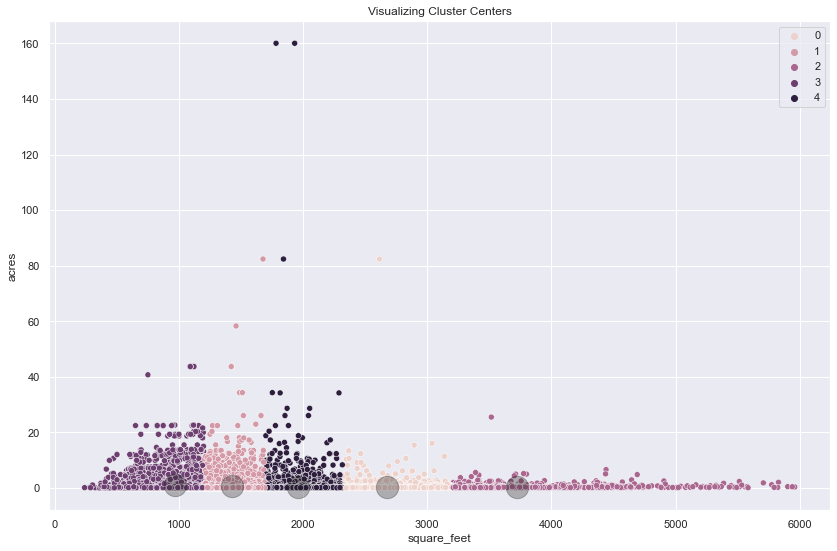

In [128]:
import matplotlib.pyplot as plt

# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'square_feet', y= 'acres', data = train, hue = train.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'square_feet', y = 'acres', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [129]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [183]:
X = train[['longitude', 'latitude']]
X.head(3)

longitude    latitude
0 -118093125.0  33961204.0
1 -117593933.0  33404202.0
2 -118344163.0  34183576.0

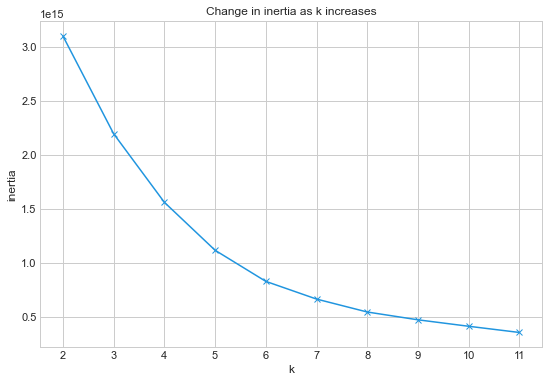

In [184]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [185]:
import viz_kmeans

#define the thing
kmeans = KMeans(n_clusters=10)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([3, 6, 0, ..., 6, 4, 9], dtype=int32)

In [186]:
train['cluster'] = kmeans.predict(X)

train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...   tax_rate  \
0       1139.0  6037.0            0.0             2.0  ...  77.088243   
1        882.0  6059.0            0.0             1.0  ...  99.593289   
2        943.0  6037.0            0.0             1.0  ...  91.300853   
3       1449.0  6037.0            0.0             3.0  ...  77.842486   
4       1546.0  6037.0            0.0             2.0  ...  51.992135   

      acres  level_of_log_error  square_feet_bins  lot_sqft_bins  acre_bins  \
0  0.115886            Accurate           1k-1.5k          0-10k       0-15   
1  0.094582            Accurate            500-1k          0-10k       0-15   
2  0.163522            Accurate            500-1k          0-10k       0-15   
3  0.141919                Over           1k-1.5k          0-10k       0-15   
4  0.195294            Accurate           1.5l-2k          0-10k       0-15   

   cluster        cen_x     cen_y        c  
0        3   980.973391  0.013482  #DF2020  
1        6   980.973391  0.013482  #DF2020  
2        0   980.973391  0.013482  #DF2020  
3        5  1441.981177  0.014553  #81DF20  
4        2  1441.981177  0.014553  #81DF20  

[5 rows x 38 columns]

In [187]:
# Cluster Centers aka (centroids)

kmeans.cluster_centers_

array([[-1.18384372e+08,  3.40826669e+07],
       [-1.17929123e+08,  3.38053615e+07],
       [-1.18125615e+08,  3.46272924e+07],
       [-1.18141400e+08,  3.41066068e+07],
       [-1.18842659e+08,  3.42200968e+07],
       [-1.17867498e+08,  3.40565789e+07],
       [-1.17679510e+08,  3.35851891e+07],
       [-1.19178827e+08,  3.42547882e+07],
       [-1.18236737e+08,  3.38524545e+07],
       [-1.18529634e+08,  3.42783627e+07]])

In [188]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

longitude      latitude
0 -1.183844e+08  3.408267e+07
1 -1.179291e+08  3.380536e+07
2 -1.181256e+08  3.462729e+07
3 -1.181414e+08  3.410661e+07
4 -1.188427e+08  3.422010e+07
5 -1.178675e+08  3.405658e+07
6 -1.176795e+08  3.358519e+07
7 -1.191788e+08  3.425479e+07
8 -1.182367e+08  3.385245e+07
9 -1.185296e+08  3.427836e+07

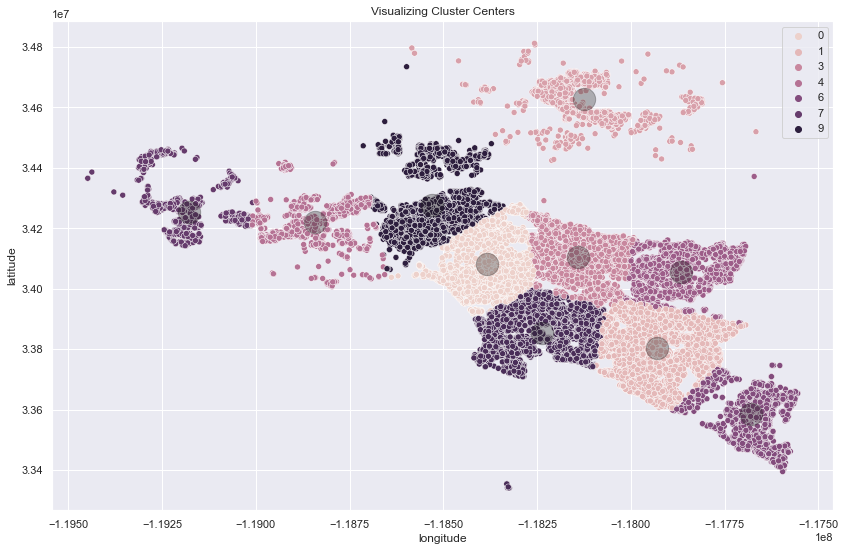

In [189]:
import matplotlib.pyplot as plt

# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'longitude', y= 'latitude', data = train, hue = train.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'longitude', y = 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [190]:
X = train[['tax_rate', 'square_feet']]
X.head(3)

tax_rate  square_feet
0  77.088243       1139.0
1  99.593289        882.0
2  91.300853        943.0

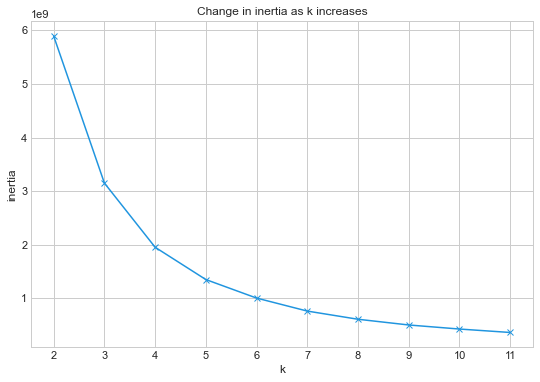

In [191]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [143]:
import viz_kmeans

#define the thing
kmeans = KMeans(n_clusters=6)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, ..., 0, 5, 5], dtype=int32)

In [144]:
train['cluster'] = kmeans.predict(X)

train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...   tax_rate  \
0       1139.0  6037.0            0.0             2.0  ...  77.088243   
1        882.0  6059.0            0.0             1.0  ...  99.593289   
2        943.0  6037.0            0.0             1.0  ...  91.300853   
3       1449.0  6037.0            0.0             3.0  ...  77.842486   
4       1546.0  6037.0            0.0             2.0  ...  51.992135   

      acres  level_of_log_error  square_feet_bins  lot_sqft_bins  acre_bins  \
0  0.115886            Accurate           1k-1.5k          0-10k       0-15   
1  0.094582            Accurate            500-1k          0-10k       0-15   
2  0.163522            Accurate            500-1k          0-10k       0-15   
3  0.141919                Over           1k-1.5k          0-10k       0-15   
4  0.195294            Accurate           1.5l-2k          0-10k       0-15   

   cluster        cen_x     cen_y        c  
0        1   980.973391  0.013482  #DF2020  
1        1   980.973391  0.013482  #DF2020  
2        1   980.973391  0.013482  #DF2020  
3        3  1441.981177  0.014553  #81DF20  
4        3  1441.981177  0.014553  #81DF20  

[5 rows x 38 columns]

In [145]:
# Cluster Centers aka (centroids)

kmeans.cluster_centers_

array([[  79.98588748, 1811.05011544],
       [  76.39455132,  943.69865571],
       [  82.39250877, 3047.85982105],
       [  78.09468533, 1363.42952327],
       [  91.34884909, 4061.41820768],
       [  81.07845048, 2365.73578826]])

In [146]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

tax_rate  square_feet
0  79.985887  1811.050115
1  76.394551   943.698656
2  82.392509  3047.859821
3  78.094685  1363.429523
4  91.348849  4061.418208
5  81.078450  2365.735788

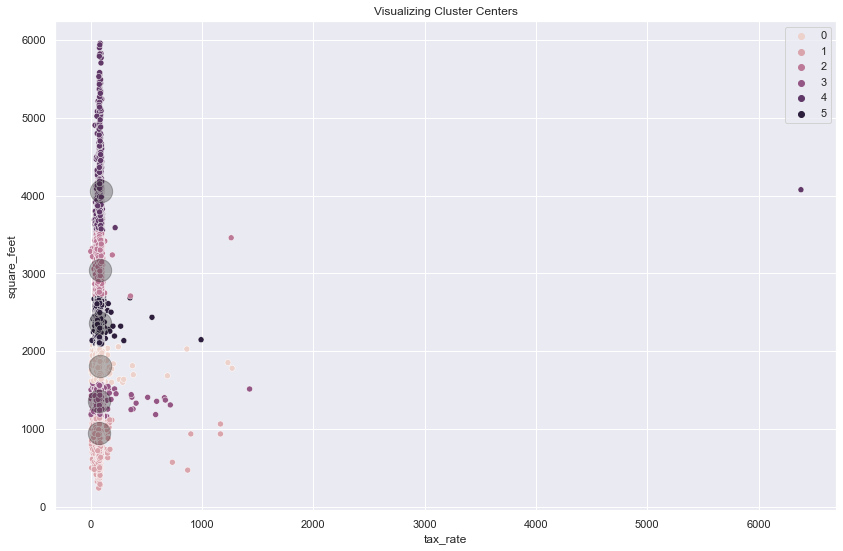

In [147]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'tax_rate', y= 'square_feet', data = train, hue = train.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'tax_rate', y = 'square_feet', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [209]:
X = train[['quality', 'latitude']]
X.head(3)

quality    latitude
0      6.0  33961204.0
1      6.0  33404202.0
2      4.0  34183576.0

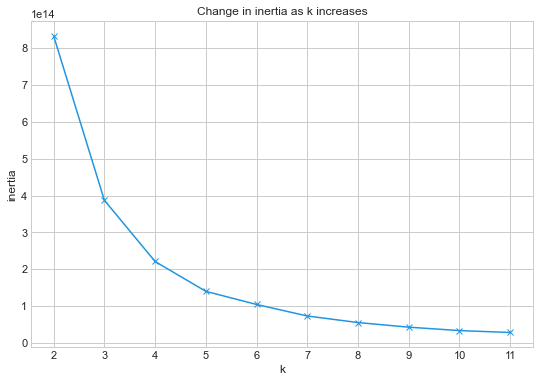

In [210]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [211]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([4, 3, 0, ..., 3, 0, 0], dtype=int32)

In [207]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

quality  house_age
0  5.339940  92.833141
1  6.937935  32.632778
2  6.064964  62.232733

KeyError: 'latitude'

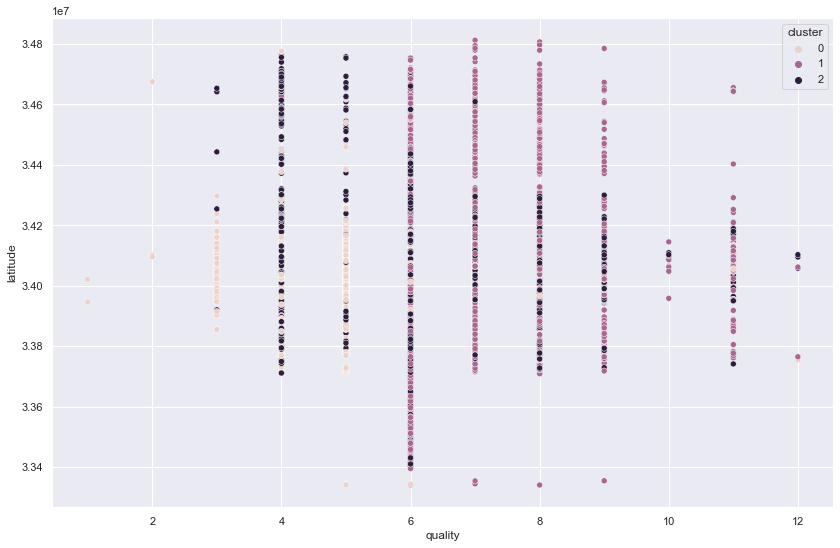

In [208]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'quality', y= 'latitude', data = train, hue = train.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'quality', y = 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [218]:
X = train[['quality', 'house_age']]
X.head(3)

quality  house_age
0      6.0       70.0
1      6.0       65.0
2      4.0       81.0

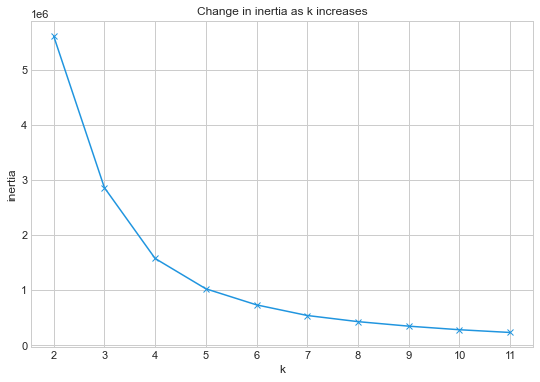

In [219]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [220]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, ..., 3, 4, 1], dtype=int32)

In [221]:
train['cluster'] = kmeans.predict(X)

train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...   tax_rate  \
0       1139.0  6037.0            0.0             2.0  ...  77.088243   
1        882.0  6059.0            0.0             1.0  ...  99.593289   
2        943.0  6037.0            0.0             1.0  ...  91.300853   
3       1449.0  6037.0            0.0             3.0  ...  77.842486   
4       1546.0  6037.0            0.0             2.0  ...  51.992135   

      acres  level_of_log_error  square_feet_bins  lot_sqft_bins  acre_bins  \
0  0.115886            Accurate           1k-1.5k          0-10k       0-15   
1  0.094582            Accurate            500-1k          0-10k       0-15   
2  0.163522            Accurate            500-1k          0-10k       0-15   
3  0.141919                Over           1k-1.5k          0-10k       0-15   
4  0.195294            Accurate           1.5l-2k          0-10k       0-15   

   cluster        cen_x     cen_y        c  
0        1   980.973391  0.013482  #DF2020  
1        1   980.973391  0.013482  #DF2020  
2        1   980.973391  0.013482  #DF2020  
3        4  1441.981177  0.014553  #81DF20  
4        3  1441.981177  0.014553  #81DF20  

[5 rows x 38 columns]

In [222]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

quality  house_age
0  6.924776  38.107498
1  5.563207  70.464459
2  5.318151  98.283063
3  6.980311  19.993437
4  6.596249  54.605627

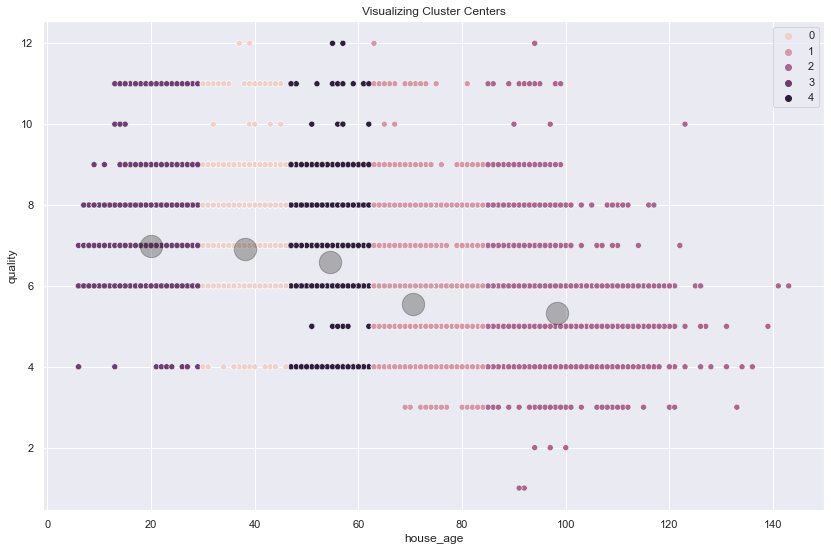

In [223]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'house_age', y= 'quality', data = train, hue = train.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'house_age', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [225]:
from scipy import stats

In [229]:
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least two of the 3 clusters.'
alpha = 0.05
F, p = stats.f_oneway(train[train.cluster == 0].logerror,
                      train[train.cluster == 1].logerror,
                      train[train.cluster == 2].logerror,
                      train[train.cluster == 3].logerror,
                      train[train.cluster == 4].logerror)

In [230]:
if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')
print('Anova Test Results on Latitude and Longitude Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

We reject the null hypothesis:
 There is no signficant difference between the log error means of each individual cluster. 

We continue forward with our alternative hypothesis:
 There is a signficant difference between the log error means of at least two of the 3 clusters. 

Anova Test Results on Latitude and Longitude Cluster
Our F-value:
 5.193783131622497
Our P-value:
 0.00035182187286223723


# Stat Tests 


In [ ]:
from scipy import stats

In [ ]:
observed = pd.crosstab(train.logerror, train.has_heating_system)

In [ ]:
observed

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "logerror and has-heating_system are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

## Takeaways

- With a p value of .34, we fail to reject the null hypo. This tells us that logerror and has_heating_system are independent of each other. 

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
observed = pd.crosstab(train.level_of_log_error, train.has_heating_system)

In [ ]:
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "logerror and has-heating_system are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

## Takeaways


- If we use le vel of log error we end up rejecting the null hypo. 
- We need to ask if we should be using the OG logerror feature or levewl of log. error to determing the relationships.

In [ ]:
observed = pd.crosstab(train.level_of_log_error, train.fips)

In [ ]:
observed